In [75]:
import pandas as pd
import re
import string
import nltk
%matplotlib inline 

In [76]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('SMSSpamCollection', sep = '\t', header=None)
data.columns = ['label', 'msg']

In [77]:
#text cleaning

In [78]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('W+', txt)
    txt = [ps.stem(word)for word in tokens if word not in stopwords]
    return txt

import string 
def punctuation_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

data['punctuation_%'] = data['msg'].apply(lambda x: len(x)).values
data.head()

data['msg_len'] = data['msg'].apply(lambda x: len(x)).values
data.head()

,label,msg,punctuation_%,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,111
1,ham,Ok lar... Joking wif u oni...,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,ham,U dun say so early hor... U c already then say...,49,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61


In [79]:
#plot message lengths for spam and ham

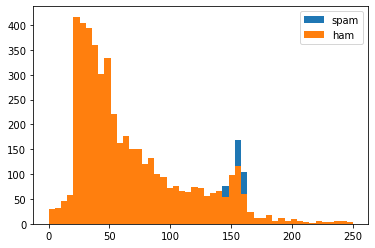

In [80]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 250, 50)
pyplot.hist(data[data['label'] == 'spam']['msg_len'], bins, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['msg_len'], bins, label = 'ham')
pyplot.legend(loc='upper right')
pyplot.show()

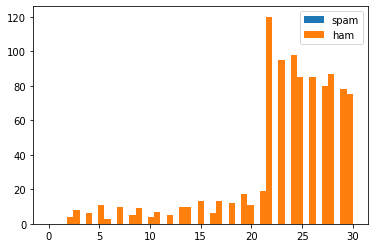

In [81]:
bins = np.linspace(0, 30, 50)
pyplot.hist(data[data['label'] == 'spam']['msg_len'], bins, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['msg_len'], bins, label = 'ham')
pyplot.legend(loc='upper right')
pyplot.show()

In [82]:
#transformation process

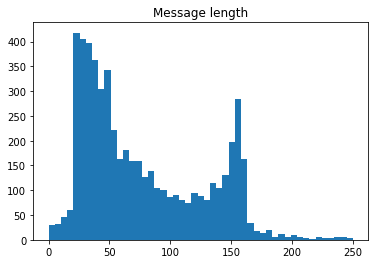

In [83]:
bins = np.linspace(0, 250, 50)
pyplot.hist(data['msg_len'], bins)
pyplot.title('Message length')
pyplot.show()

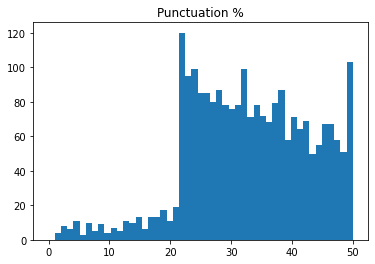

In [84]:
bins = np.linspace(0, 50, 50)
pyplot.hist(data['punctuation_%'], bins)
pyplot.title('Punctuation %')
pyplot.show()

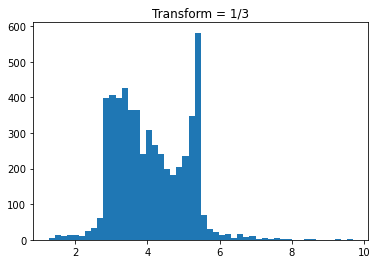

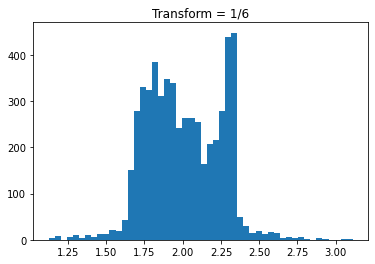

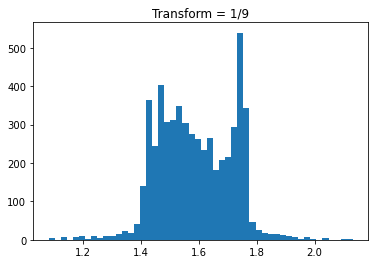

In [85]:
for i in [3, 6, 9]:
    pyplot.hist((data['punctuation_%'])**(1/i), bins=50)
    pyplot.title(f'Transform = 1/{i}')
    pyplot.show()

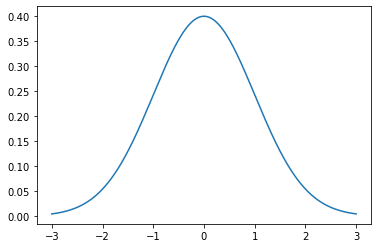

In [86]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x)) # probability density functions (from the arange value) 
plt.show()

### ACTIVITY

#### 1.Use the Probability Density Function (pdf) to transform the data


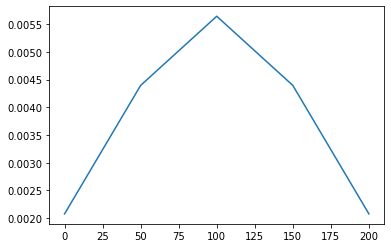

In [87]:
x = np.arange(0, 250, 50)
plt.plot(x, norm.pdf(x,  np.mean(x),np.std(x)))
plt.show()

#### 2. Plot the data using Scatter Plot

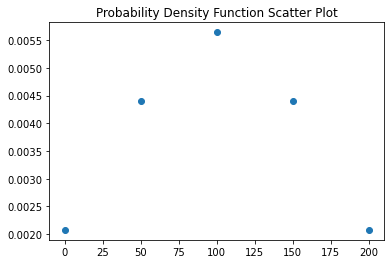

In [88]:
plt.scatter(x, norm.pdf(x,  np.mean(x),np.std(x)))
plt.title('Probability Density Function Scatter Plot')
plt.show()

#### 3. Use np.random.normal(Value1, Value2, Value3) and plot the results.

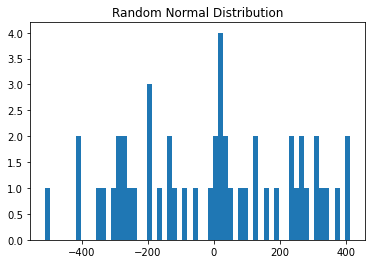

In [89]:
weight = np.random.normal(0, 250, 50)
plt.hist(weight, 60)
pyplot.title('Random Normal Distribution')
plt.show()

#### 4. Using the Random Forest Algorithm, Compare the accuracy of the Irish dataset to SMSSpamCollection
#### 5. Change the Train Test to 80 percent training and 20 percent Test. Check the Accuracy

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf.fit_transform(data['msg'])
X = pd.concat([data['msg_len'], data['punctuation_%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5)
rf = RandomForestClassifier(n_jobs=-1)
cross_val_score(rf, X, data['label'], cv=kf, n_jobs=-1)

from sklearn.metrics import precision_recall_fscore_support as prfs_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.1)
rf = RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1)
rfmodel = rf.fit(X_train, y_train)

In [92]:
y_pred = rfmodel.predict(X_test)
accuracy = (y_pred == y_test).sum()/len(y_pred)
print(f'SMSSpam Collections Accuracy = {accuracy}')

SMSSpam Collections Accuracy = 0.8835125448028673


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
iris = datasets.load_iris()

import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

#features
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  
y=data['species']  # Labels

#80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics

iris_accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'IRIS Dataset Accuracy = {iris_accuracy}')

IRIS Dataset Accuracy = 0.9333333333333333


Explanation:
Based on the comparison dataset of SMSSpamCollections and Iris, we can say that the Iris is more accurate than SMSSpamCollections.